In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [79]:
train = pd.read_csv("exoTrain.csv")
test = pd.read_csv("exoTest.csv")

y_train = train['LABEL']
y_test = test['LABEL']
del train['LABEL']
del test['LABEL']

# convert to numpy rep for keras
x_train = train.values
x_test = test.values 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# change labels: 2 => 1, 1 => 0
y_train = y_train - 1
y_test = y_test - 1

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(5087, 1)
(570, 1)
(5087, 3197)
(570, 3197)


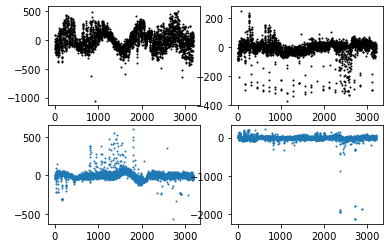

In [80]:
x = np.arange(0, 3197, 1)
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].scatter(x, x_train[0], s=1, c='black')
ax[0][1].scatter(x, x_train[1], s=1, c='black')
ax[1][0].scatter(x, x_train[38], s=1)
ax[1][1].scatter(x, x_train[100], s=1)

In [81]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(3197,1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 3195, 32)          128       
                                                                 
 conv1d_36 (Conv1D)          (None, 3193, 64)          6208      
                                                                 
 dense_30 (Dense)            (None, 3193, 64)          4160      
                                                                 
 dense_31 (Dense)            (None, 3193, 1)           65        
                                                                 
Total params: 10,561
Trainable params: 10,561
Non-trainable params: 0
_________________________________________________________________


In [82]:
training = model.fit(x_train, y_train, validation_split=0.2, epochs=2)

Epoch 1/2
128/128 [==============================] - 28s 217ms/step - loss: 0.2405 - accuracy: 0.9669 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 2/2
128/128 [==============================] - 27s 211ms/step - loss: 0.1369 - accuracy: 0.9909 - val_loss: 0.0098 - val_accuracy: 1.0000


In [83]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

18/18 [==============================] - 1s 69ms/step - loss: 0.1338 - accuracy: 0.9912
Test accuracy: 0.9912280440330505
